In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


%matplotlib inline

In [ ]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('creditcard.csv')
df.head(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [ ]:
legit= df[df.Class==0]
fraud= df[df.Class==1]
print(legit)
print(fraud)

        Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
11953  20625 -0.653155  0.372141  2.209254 -2.151937  0.451189  0.822337   
11954  20631  1.504204 -0.411728  0.200090 -0.778753 -0.442232 -0.119677   
11955  20636  1.134994  0.096340  0.277921  0.319692  0.742800  1.611803   
11956  20638 -6.305012  3.944886 -4.707362  1.539602 -3.934785 -1.730565   
11957  20638  1.161960 -0.398297  1.123732 -0.474237 -1.226667 -0.519325   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.2395

In [ ]:
legit.Amount.describe()

,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


In [ ]:
fraud.Amount.describe()

,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


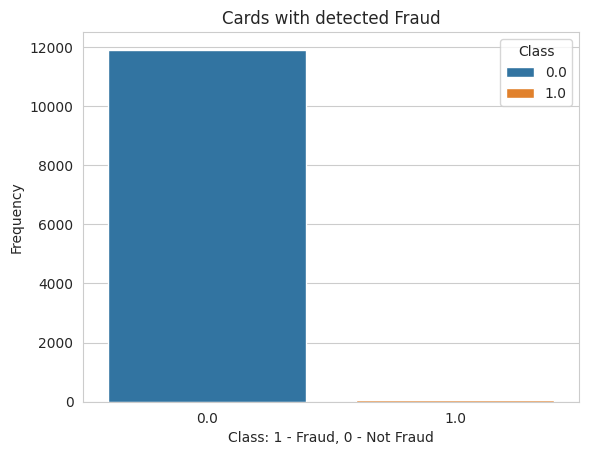

In [ ]:
sns.set_style('whitegrid')
sns.countplot(df,
              x='Class',
              hue='Class')
plt.title('Cards with detected Fraud')
plt.xlabel('Class: 1 - Fraud, 0 - Not Fraud')
plt.ylabel('Frequency');

In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,11906
1.0,52


In [ ]:
df.isna().sum().any()

True

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Handle missing values in the target variable ('Class') as well
imputer = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' for categorical target
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer.transform(y_test.values.reshape(-1, 1))

# Flatten the y arrays after imputation
y_train = y_train.flatten()
y_test = y_test.flatten()

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.999581764951903

<Axes: >

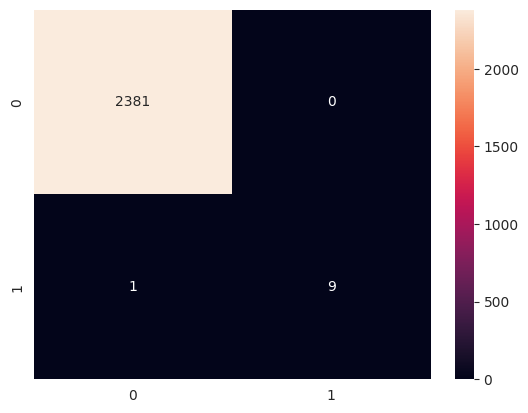

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['Class'], axis=1)
y = df['Class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

# ... (Your existing code to load 'df' and define X and y)

# Handle missing values in 'y'
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical target
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y_imputed = y_imputed.flatten()  # Flatten the array

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

rfc_kfold = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc_accu_stratified = []

# Use the imputed y for StratifiedKFold
for train_index, test_index in skf.split(X, y_imputed):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y_imputed[train_index], y_imputed[test_index]
    rfc_kfold.fit(x_train_fold, y_train_fold)
    rfc_accu_stratified.append(rfc_kfold.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', rfc_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(rfc_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(rfc_accu_stratified)*100, '%')

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
rfc_kfold = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rfc_kfold.fit(x_train_fold, y_train_fold)
    rfc_accu_stratified.append(rfc_kfold.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', rfc_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(rfc_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(rfc_accu_stratified)*100, '%')

ValueError: Input y contains NaN.

In [ ]:
print('\nOverall Accuracy:',
      np.mean(rfc_accu_stratified)*100, '%')


Overall Accuracy: nan %


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# oversampling

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overresampled, y_overresampled = oversampler.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [ ]:
# undersampling

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_underresampled, y_underresampled = undersampler.fit_resample(X, y)

NameError: name 'X' is not defined

In [ ]:
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_oversampled = KNeighborsClassifier(n_neighbors=5)
knn_oversampled.fit(X_overresampled, y_overresampled)

NameError: name 'X_overresampled' is not defined

In [ ]:
knn_undersampled = KNeighborsClassifier(n_neighbors=5)
knn_undersampled.fit(X_underresampled, y_underresampled)

KNeighborsClassifier()

In [ ]:
y_test_pred_original = knn_original.predict(X_test)

In [ ]:
y_test_pred_oversampled = knn_oversampled.predict(X_test)
y_test_pred_undersampled = knn_undersampled.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


NameError: name 'knn_undersampled' is not defined

In [ ]:
y_train_pred_original = knn_original.predict(X_train)
y_train_pred_oversampled = knn_oversampled.predict(X_overresampled)
y_train_pred_undersampled = knn_undersampled.predict(X_underresampled)

In [ ]:
print("Accuracy on Original Train Set:", accuracy_score(y_train, y_train_pred_original))
print("Accuracy on Oversampled Train Set:", accuracy_score(y_overresampled, y_train_pred_oversampled))
print("Accuracy on Undersampled Train Set:", accuracy_score(y_underresampled, y_train_pred_undersampled))

# Calculate and print accuracy for test sets
print("\nAccuracy on Original Test Set:", accuracy_score(y_test, y_test_pred_original))
print("Accuracy on Oversampled Test Set:", accuracy_score(y_test, y_test_pred_oversampled))
print("Accuracy on Undersampled Test Set:", accuracy_score(y_test, y_test_pred_undersampled))

Accuracy on Original Train Set: 0.9984507011345433
Accuracy on Oversampled Train Set: 0.9995357262191583
Accuracy on Undersampled Train Set: 0.7682926829268293

Accuracy on Original Test Set: 0.9983673326077034
Accuracy on Oversampled Test Set: 0.9991222218320986
Accuracy on Undersampled Test Set: 0.6423229521435343


In [ ]:
# original (without sampling) confusion matrix

sns.heatmap(confusion_matrix(y_test, y_test_pred_original),
            annot=True,
            fmt='d')

NameError: name 'confusion_matrix' is not defined

In [ ]:
# oversampling confusion matrix

sns.heatmap(confusion_matrix(y_test, y_test_pred_oversampled),
            annot=True,
            fmt='d')

NameError: name 'y_test_pred_oversampled' is not defined

In [ ]:
# undersampling confusion matrix

sns.heatmap(confusion_matrix(y_test, y_test_pred_undersampled),
            annot=True,
            fmt='d')